# <font color = red>Table of Contents </font>

> [Kaggle Mall Customers Dataset - Problem Statement and Feature Information](#Kaggle_Mall_Customers_Dataset)
<br>
> [Import Libraries and Dataset](#Import_Libraries)
<br>
> [Exploratory Data Analysis](#EDA)
<br>
> [K-Means Clustering](#K_Means_Clustering)
<br>
> [Silhouette Score for K-Means](#Silhouette_Score_for_K-Means)
<br>
> [Hierarchical Clustering](#Hierarchical_Clustering)

<a id='Kaggle_Mall_Customers_Dataset'></a>

# Kaggle Mall Customers Dataset

Source:  https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

Problem Statement You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

By the end of this case study , you would be able to answer below questions:
1) How to achieve customer segmentation using machine learning algorithm (KMeans Clustering) in Python in simplest way. 
2) Who are your target customers with whom you can start marketing strategy [easy to converse] 3) How the marketing strategy works in real world
<br>
<br>
<b>Features in Dataset:</b>
<br>CustomerID
<br>Gender
<br>Age
<br>Annual Income (k$)
<br>Spending Score (1-100) - The closer the spending score is to 1,  the lesser the client spends.  The closer the spending score is to 100, the more the client spends.


<a id='Import_Libraries'></a>

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline

In [2]:
#Import dataset
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
#Rename Variables "Annual Income (k$)" and "Spending Score (1-100)" for easy reference
df.rename(index=str, columns={"Annual Income (k$)": "AnnualIncome", "Spending Score (1-100)": "SpendingScore"}, inplace=True)

<a id='EDA'></a>
# EDA

In [6]:
#Reference : https://towardsdatascience.com/customer-segmentation-analysis-with-python-6afa16a38d9e
#Descriptive Statistics for each variable
#All variables appear to be within normal range.
#From calling describe, you can see that there are no values to clean. Age looks pretty normally distributed, annual income doesn’t have outliers that are too excessive. Spending score is in fact between 1 and 100. Everything looks good.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
AnnualIncome,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
SpendingScore,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


Text(0.5,1,'Distribution of Gender')

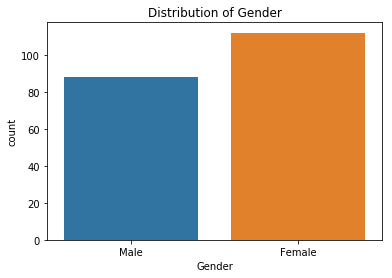

In [7]:
#To see how the categorical variables are split up.
#Distribution of Gender
sns.countplot(x='Gender', data=df);
plt.title('Distribution of Gender')

#Plot shows that there are slightly more women than men in this data set.

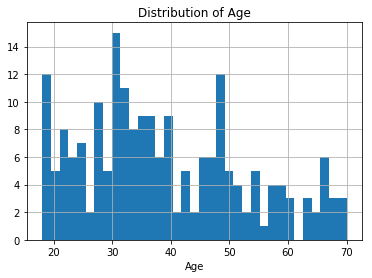

In [8]:
#Distribution of Age
df.hist('Age', bins=35);
plt.title('Distribution of Age');
plt.xlabel('Age');

# It appears that ages are mosty between 30 and 40.  The mean age in descriptive statistics was 38.85.  
# There are a lot less older customers in this dataset so perhaps the people who shop at this mall appeal to younger people.

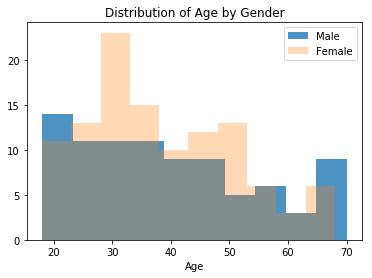

In [9]:
# Displaying age histogram for each gender by overlaying the two histograms.
plt.hist('Age', data=df[df.Gender == 'Male'], alpha=0.8, label='Male');
plt.hist('Age', data=df[df.Gender == 'Female'], alpha=0.3, label='Female');
plt.title('Distribution of Age by Gender');
plt.xlabel('Age');
plt.legend();

#Males tend to younger than females in this data set.
#There are more middle-aged women than men in this data set.
#There is a significant amount of senior men in the 65-70 year old range.

Text(0.5,0,'Thousands of Dollars')

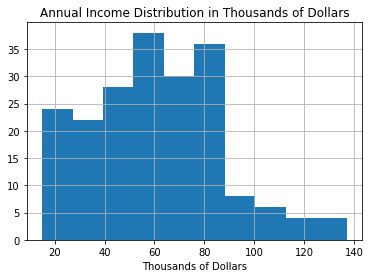

In [10]:
#Exploring how income is distributed:
df.hist('AnnualIncome');
plt.title('Annual Income Distribution in Thousands of Dollars')
plt.xlabel('Thousands of Dollars')

# Most of the customers' income lie between 55 and 85 thousand dollars. 

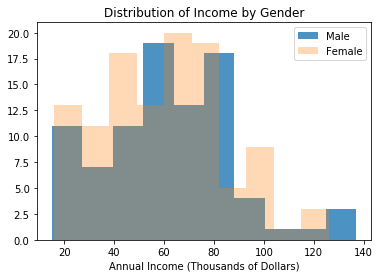

In [11]:
#Distribution of income by gender
plt.hist('AnnualIncome', data=df[df.Gender == 'Male'], alpha=0.8, label='Male');
plt.hist('AnnualIncome', data=df[df.Gender == 'Female'], alpha=0.3, label='Female');
plt.title('Distribution of Income by Gender');
plt.xlabel('Annual Income (Thousands of Dollars)');
plt.legend();

#It appears that the males in this dataset earn more than the women.

Mean Spending Score for Males is 48.51136363636363
Mean Spending Score for Females is 51.526785714285715


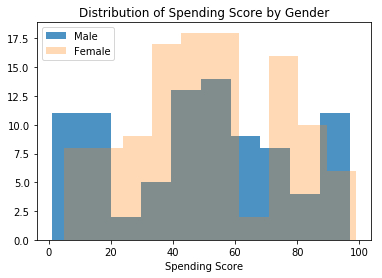

In [12]:
#Distribution of Spending Score by gender
plt.hist('SpendingScore', data=df[df.Gender == 'Male'], alpha=0.8, label='Male');
plt.hist('SpendingScore', data=df[df.Gender == 'Female'], alpha=0.3, label='Female');
plt.title('Distribution of Spending Score by Gender');
plt.xlabel('Spending Score');
plt.legend();

print('Mean Spending Score for Males is', df.SpendingScore[df.Gender =='Male'].mean())
print('Mean Spending Score for Females is', df.SpendingScore[df.Gender =='Female'].mean())
#It appears that the females in this dataset have higher spending scores than the men.
#Overall, although men had higher incomes, women spent more! (maybe spending their own and partners' money!)

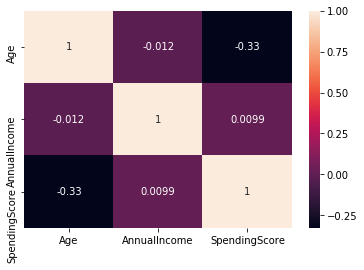

In [13]:
#Correlation heatmap of Age, Annual Income and Spending Score:
sns.heatmap((df.iloc[:, [2,3,4]]).corr(), annot=True)

#It appears from the plot that the only variables that are somewhat correlated is spending score and age.
#It is a negative correlation so the older the customers are in this data set, the lower their spending score.
#0.33 is not a very strong correlation.

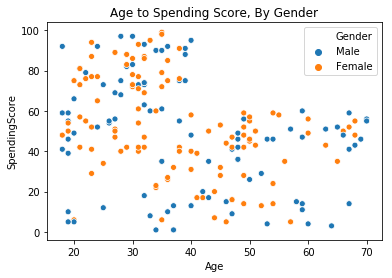

In [14]:
#Scatterplot to show the trend between spending score and age:
sns.scatterplot('Age', 'SpendingScore', hue='Gender', data=df);
plt.title('Age to Spending Score, By Gender');

#Can see the slight negative trend in plot

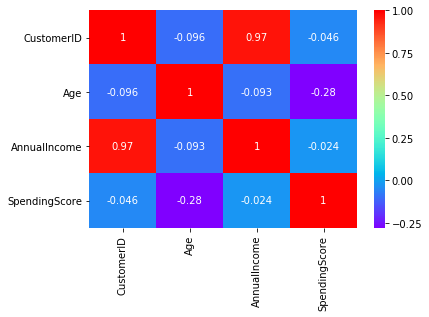

In [15]:
#Exploring with a heatmap if there is a stronger correlation for men or women 
male_customers=df[df.Gender == 'Male']
female_customers=df[df.Gender == 'Female']

#Heatmap for Male Customers only
sns.heatmap(male_customers.corr(), annot=True, cmap='rainbow');

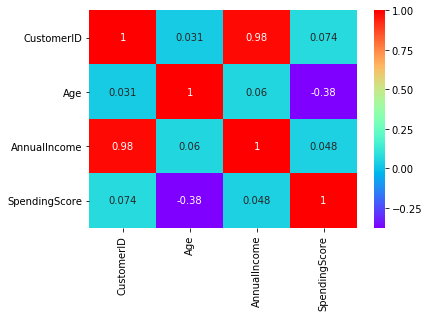

In [16]:
#Heatmap for Female Customers only
sns.heatmap(female_customers.corr(), annot=True, cmap='rainbow');

#We can see that age more strongly affects spending score for women than men.


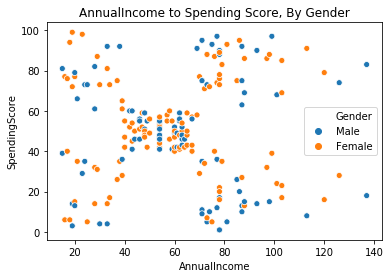

In [17]:
#Scatterplot to show income to spending score by Gender:
sns.scatterplot('AnnualIncome', 'SpendingScore', hue='Gender', data=df);
plt.title('AnnualIncome to Spending Score, By Gender');

#There appears to be some patterning here although there is 0 correlation.  But we can think of these as customer segments.

In [18]:
# Check for missing values
    
df[df.isnull().any(axis=1)]    
#Looks like no missing values

,CustomerID,Gender,Age,AnnualIncome,SpendingScore


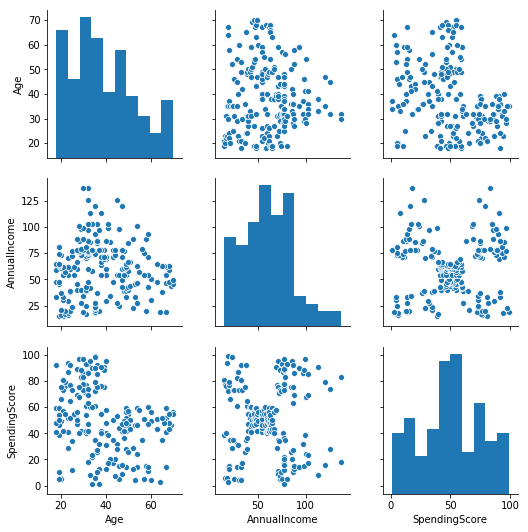

In [19]:
sns.pairplot(df.iloc[:, [2,3,4]])

In [20]:
#Define X with 3 Features (Age, Annual Income and Spending Score)
#X = df.iloc[:, [2,3,4]].values

#Creating and array X containing 2 Features (Annual Income and Spending Score)
X = df.iloc[:, [3,4]].values


<a id='K_Means_Clustering'></a>
# K-Means Clustering

In [21]:
#Train Test Split?
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1118)

In [22]:
# Feature Scaling?
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.transform(X_test)
# sc_y = StandardScaler()
# y_train = sc_y.fit_transform(y_train)

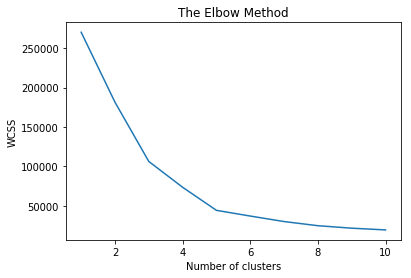

In [23]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 1118)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Choose n_cluster = 5?

In [24]:
# Fitting K-Means to the Dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 1118)
y_kmeans = kmeans.fit_predict(X)


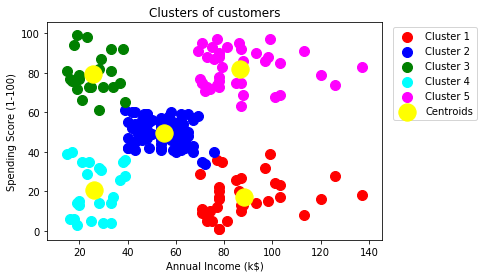

In [25]:
# Visualising the Clusters

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(bbox_to_anchor=(1.3,1),loc="upper right")

plt.show()

<a id='Silhouette_Score_for_K-Means'></a>


# Silhouette Score for K-Means ??

In [26]:
#See https://towardsdatascience.com/k-means-clustering-from-a-to-z-f6242a314e9a
#Silhouette score: Silhouette score tells how far away the datapoints in one cluster are, from the datapoints in another cluster. 
#The range of silhouette score is from -1 to 1. Score should be closer to 1 than -1.
labels=kmeans.labels_
from sklearn import metrics
sklearn.metrics.silhouette_score(X, labels, metric='euclidean', sample_size=None, random_state=None)

print("Silhouette Coefficient for K-Means: %0.3f"
      % metrics.silhouette_score(X, labels))

Silhouette Coefficient for K-Means: 0.554


<a id='Hierarchical_Clustering'></a>
# Hierarchical Clustering

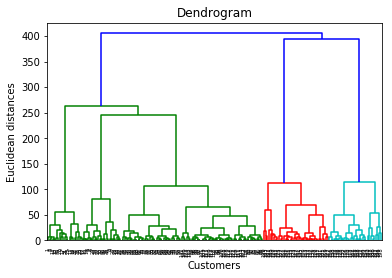

In [27]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [28]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

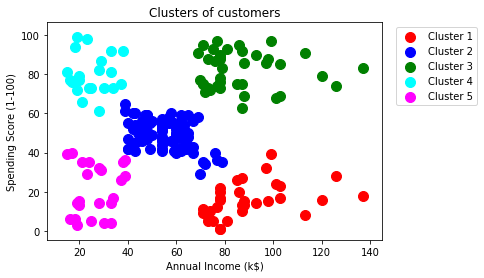

In [29]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(bbox_to_anchor=(1.3,1),loc="upper right")
plt.show()

# Silhouette Score for Hierarchical Clustering

from sklearn import metrics
sklearn.metrics.silhouette_score(X_train, y_hc, metric='euclidean', sample_size=None, random_state=None)

print("Silhouette Coefficient for K-Means: %0.3f"
      % metrics.silhouette_score(X, labels))

# DBSCAN

In [34]:
#https://towardsdatascience.com/how-dbscan-works-and-why-should-i-use-it-443b4a191c80
#The DBSCAN algorithm basically requires 2 parameters:
#eps: the minimum distance between two points. It means that if the distance between two points is lower or equal to this value (eps), these points are considered neighbors.
#minPoints: the minimum number of points to form a dense region. For example, if we set the minPoints parameter as 5, then we need at least 5 points to form a dense region.


from sklearn import metrics
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X);

from sklearn.cluster import DBSCAN
#eps and min_samples is trial and error
db = DBSCAN(eps=0.4, min_samples=10)
y_db=db.fit_predict(X);


# Try this:
#     # Compute DBSCAN
# db = DBSCAN(eps=0.3, min_samples=10).fit(X)
# core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# core_samples_mask[db.core_sample_indices_] = True
# labels = db.labels_

# # Number of clusters in labels, ignoring noise if present.
# n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# n_noise_ = list(labels).count(-1)

# print('Estimated number of clusters: %d' % n_clusters_)
# print('Estimated number of noise points: %d' % n_noise_)
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
# print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# print("Adjusted Rand Index: %0.3f"
#       % metrics.adjusted_rand_score(labels_true, labels))
# print("Adjusted Mutual Information: %0.3f"
#       % metrics.adjusted_mutual_info_score(labels_true, labels))
# print("Silhouette Coefficient: %0.3f"
#       % metrics.silhouette_score(X, labels))


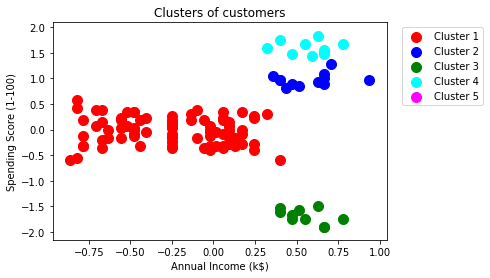

In [31]:
# Visualising the clusters
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_db == 2, 0], X[y_db == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_db == 3, 0], X[y_db == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_db == 4, 0], X[y_db == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(bbox_to_anchor=(1.3,1),loc="upper right")
plt.show()

In [32]:
#Silhoette Coefficient

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Silhouette Coefficient: 0.555
